Central questions: can classifiers be trained using neuroimaging meta-analysis data (i.e., coordinates, modeled activation maps, etc.). 
Goals: [1] train classifier using coordinates/modeled activation maps, [2]...

In [1]:
# Import libraries and packages.
import pandas as pd
import numpy as np
import glob
import datetime; today = datetime.date.today()
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma.kernel import ALEKernel

In [2]:
# Select directories and files structure.
input_prefix = str(today)
output_prefix = str(today)
in_dir = 'constructs'
out_dir = 'out'
test_dir = 'neurosynth'
# paths = glob.glob("constructs/*.txt")
paths=['constructs/saccades.txt',
      'constructs/tmind.txt',
      'constructs/pain.txt',
      'constructs/counting.txt']
print('constructs to model = {0}'.format(len(paths)))

constructs to model = 4


In [3]:
# Convert coordinates to nimare dataset. DOES NOT WORK!
datas = {}
for path in paths:
    print(path)
    datas[path[len(in_dir) + 1:-4]] = convert_sleuth_to_dataset(path)
datas.keys()  # Confirm construct keys.

constructs/saccades.txt
constructs/tmind.txt
constructs/pain.txt
constructs/counting.txt


dict_keys(['saccades', 'tmind', 'pain', 'counting'])

In [4]:
print('MA maps making...\t\t@{0}'.format(str(datetime.datetime.now())))
ma_maps_arrs = {}
for data in datas.keys():
    kern = ALEKernel()
    ma_maps = kern.transform(datas[data])  # Compute MA maps (len = ???)
    ma_maps_arrs[data] = []
    for i in np.arange(0, len(ma_maps)):
        ma_maps_arrs[data].append(np.ravel(ma_maps[i].get_data(), order='C'))
    labels = pd.DataFrame(index=datas[data].ids)
print('MA maps done!\t\t\t@{0}'.format(str(datetime.datetime.now())))

MA maps making...		@2019-08-08 11:01:38.125538
MA maps done!			@2019-08-08 11:01:48.964393


In [5]:
keys = list(datas.keys())
dataframes = {}
key = {}
for i in np.arange(0, len(keys)):
    key[keys[i]] = i
    arr = np.asarray(ma_maps_arrs[keys[i]])
    # rescale so that the maximum value in every row is 1, to match the scaling of neurosynth data
    transformed_arr = arr/arr.max(axis=1)[:,None]
    dataframes[i] = pd.DataFrame(transformed_arr)
    dataframes[i]['y'] = i

In [6]:
train_data = pd.concat([dataframes[0], dataframes[1]], ignore_index=True)
for i in np.arange(2, len(keys)):
    train_data = pd.concat([train_data, dataframes[i]], ignore_index=True)
train_data

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
# get the test data
test_paths=['neurosynth/saccades.csv',
      'neurosynth/tmind.csv',
      'neurosynth/pain.csv',
      'neurosynth/counting.csv']
test_dataframe = {}
for i in np.arange(0, len(keys)):
    test_dataframe[i] = pd.read_csv(test_paths[i])
    test_dataframe[i]['y'] = i
test_data = pd.concat([test_dataframe[0], test_dataframe[1]], ignore_index=True)
for i in np.arange(2, len(keys)):
    test_data = pd.concat([test_data, test_dataframe[i]], ignore_index=True)
test_data = test_data.drop('Unnamed: 0', 1)
test_data

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [8]:
unique_classes = np.unique(train_data['y'])

In [9]:
# now we include all classes for training, but this can be modified to include a subset of classes
train_classes = unique_classes

In [10]:
data_train_classes = train_data.loc[train_data['y'].isin(train_classes)].reset_index(drop=True)
data_test_classes = test_data.loc[test_data['y'].isin(train_classes)].reset_index(drop=True)

In [11]:
# remove voxels which are zero in all classes in the training set
zero_voxels = (data_train_classes != 0).any(axis=0).values
sub_sampled_data_train_classes = data_train_classes.loc[:, zero_voxels]
sub_sampled_data_test_classes = data_test_classes.loc[:, zero_voxels]

In [12]:
sub_sampled_data_train_classes

,93491,93492,93493,93582,93583,93672,93673,93674,93764,102954,...,798110,798190,798191,798192,798193,798281,798282,798283,798373,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000061,0.000233,0.000725,0.000029,0.000113,0.000002,0.000012,0.000045,0.000004,6.736013e-05,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,6.882660e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
sub_sampled_data_test_classes

,93491,93492,93493,93582,93583,93672,93673,93674,93764,102954,...,798110,798190,798191,798192,798193,798281,798282,798283,798373,y
0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3


In [14]:
# use PCA to reduce dimensionality, take 100 principal components
from sklearn import decomposition
import matplotlib.pyplot as plt
pca = decomposition.PCA(n_components = 100)
y_train = sub_sampled_data_train_classes.iloc[:,-1].values
y_test = sub_sampled_data_test_classes.iloc[:,-1].values
X_train_raw = sub_sampled_data_train_classes.iloc[:,:-1].values
X_test_raw = sub_sampled_data_test_classes.iloc[:,:-1].values
pca.fit(X_train_raw)
# transform both training and test datasets
X_train = pca.transform(X_train_raw)
X_test = pca.transform(X_test_raw)

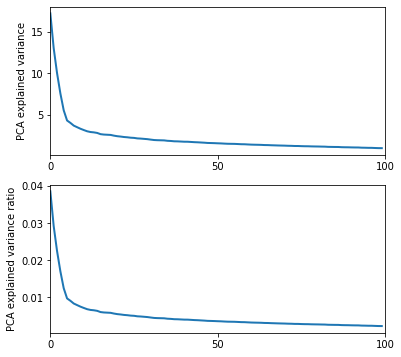

100

In [15]:
# plot the variance explained by principal components
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(6, 6))
ax0.plot(pca.explained_variance_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.set_xticks(np.arange(0, 101, 50))
ax0.set_xlim([0,100])

ax1.plot(pca.explained_variance_ratio_, linewidth=2)
ax1.set_ylabel('PCA explained variance ratio')
ax1.set_xticks(np.arange(0, 101, 50))
ax1.set_xlim([0,100])
plt.show()
pca.n_components_

In [16]:
# fit two classifiers just for fun
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
# check whether the classifiers do a decent job before training

# Linear SVM classifier
clf_svc = svm.LinearSVC(max_iter = 1000000, class_weight = 'balanced')
scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=10)
print("Accuracy with Linear SVM classifier: %0.2f (+/- %0.2f) \n" % (scores_svc.mean(), scores_svc.std() * 2))

# Ridge classifier
clf_ridge = RidgeClassifier(alpha=100, class_weight = 'balanced')
scores_ridge = cross_val_score(clf_ridge, X_train, y_train, cv=10)
print("Accuracy with Ridge classifier: %0.2f (+/- %0.2f) \n" % (scores_ridge.mean(), scores_ridge.std() * 2))

# you can inspect the scores of individual classifiers by typing scores_svc, or scores_ridge

Accuracy with Linear SVM classifier: 0.60 (+/- 0.11) 

Accuracy with Ridge classifier: 0.63 (+/- 0.09) 



In [94]:
# moving on to using the above classifiers to train on brainmap data and predicting classes of neurosynth data

# Linear SVM classifier
clf_svc = svm.LinearSVC(max_iter = 1000000, class_weight = 'balanced')
clf_svc.fit(X_train, y_train)
y_predict_svc = clf_svc.predict(X_test)
svc_accuracy = len(np.where(y_test == y_predict_svc)[0])/len(y_test)
print("Accuracy of SVC classifier on Neurosynth data: %0.2f \n" % (svc_accuracy))

# Sanity check: Shuffle the test data and see whether the classifier performs at chance
X_shuffle_test = X_test.copy()
y_shuffle_test = y_test.copy()
X_shuffle_test=np.tile(X_shuffle_test, (4, 1))
y_shuffle_test = np.tile(y_shuffle_test, (1,4))[0]
ignore_list_output = [np.random.shuffle(x) for x in X_shuffle_test]
y_predict_svc_shuffled = clf_svc.predict(X_shuffle_test)
svc_accuracy_shuffled = len(np.where(y_shuffle_test == y_predict_svc_shuffled)[0])/len(y_shuffle_test)
print("Accuracy of SVC classifier on shuffled Neurosynth data: %0.2f \n " % (svc_accuracy_shuffled))

# Sanity check: Add noise to the test data
X_noise_test = X_test.copy()
y_noise_test = y_test.copy()
X_noise_test=np.tile(X_noise_test, (4, 1))
y_noise_test = np.tile(y_noise_test, (1,4))[0]
X_noise_test = X_noise_test + np.random.normal(0, 10, X_noise_test.shape)
y_predict_svc_noise = clf_svc.predict(X_noise_test)
svc_accuracy_noise = len(np.where(y_noise_test == y_predict_svc_noise)[0])/len(y_noise_test)
print("Accuracy of SVC classifier on noisy Neurosynth data: %0.2f " % (svc_accuracy_noise))

Accuracy of SVC classifier on Neurosynth data: 1.00 

Accuracy of SVC classifier on shuffled Neurosynth data: 0.31 
 
Accuracy of SVC classifier on noisy Neurosynth data: 0.69 


In [95]:
# Ridge classifier
clf_ridge = RidgeClassifier(alpha=100, class_weight = 'balanced')
clf_ridge.fit(X_train, y_train)
y_predict_ridge = clf_ridge.predict(X_test)
ridge_accuracy = len(np.where(y_test == y_predict_ridge)[0])/len(y_test)
print("Accuracy of Ridge classifier on Neurosynth data: %0.2f \n" % (ridge_accuracy))

# Sanity check: Shuffle the test data and see whether the classifier performs at chance
y_predict_ridge_shuffled = clf_ridge.predict(X_shuffle_test)
ridge_accuracy_shuffled = len(np.where(y_shuffle_test == y_predict_ridge_shuffled)[0])/len(y_shuffle_test)
print("Accuracy of Ridge classifier on shuffled Neurosynth data: %0.2f \n " % (ridge_accuracy_shuffled))

# Sanity check: Add noise to the test data
y_predict_ridge_noise = clf_ridge.predict(X_noise_test)
ridge_accuracy_noise = len(np.where(y_noise_test == y_predict_ridge_noise)[0])/len(y_noise_test)
print("Accuracy of Ridge classifier on noisy Neurosynth data: %0.2f " % (ridge_accuracy_noise))

Accuracy of Ridge classifier on Neurosynth data: 1.00 

Accuracy of Ridge classifier on shuffled Neurosynth data: 0.38 
 
Accuracy of Ridge classifier on noisy Neurosynth data: 0.81 
